In [5]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', 
                 header=None)

from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)


In [8]:
le.transform(['M', 'B'])

array([1, 0])

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


## 用PipeLine集成学习

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
           ('pca', PCA(n_components=2)),
           ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.947


## K-Fold ： Leave one out

In [33]:
import numpy as np

from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10)

kfold.get_n_splits(X_train, y_train)

scores = []

k = 0

for train_idx,test_idx in kfold.split(X_train,y_train):
    pipe_lr.fit(X_train[train_idx],y_train[train_idx])
    score = pipe_lr.score(X_train[test_idx],y_train[test_idx])
    scores.append(score)
    
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train_idx]), score))
    
    k += 1
    
print('CV accuracy: %.3f +/- %.3f' % ( np.mean(scores), np.std(scores)))

Fold: 1, Class dist.: [256 153], Acc: 0.913
Fold: 2, Class dist.: [256 153], Acc: 0.978
Fold: 3, Class dist.: [256 153], Acc: 0.978
Fold: 4, Class dist.: [256 153], Acc: 0.913
Fold: 5, Class dist.: [256 153], Acc: 0.935
Fold: 6, Class dist.: [257 153], Acc: 0.978
Fold: 7, Class dist.: [257 153], Acc: 0.933
Fold: 8, Class dist.: [257 153], Acc: 0.956
Fold: 9, Class dist.: [257 153], Acc: 0.978
Fold: 10, Class dist.: [257 153], Acc: 0.956
CV accuracy: 0.952 +/- 0.025


In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = pipe_lr,
                        X= X_train,
                        y= y_train,
                        cv=10,
                        n_jobs=-1)

print('CV accuracy scores: %s' % scores)

CV accuracy scores: [0.91304348 0.97826087 0.97826087 0.91304348 0.93478261 0.97777778
 0.93333333 0.95555556 0.97777778 0.95555556]


In [39]:
print('CV accuracy: %.3f +/- %.3f' % ( np.mean(scores), np.std(scores)))

CV accuracy: 0.952 +/- 0.025


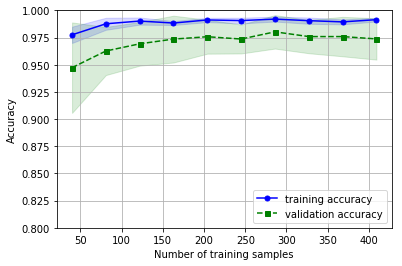

In [43]:
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve

pipe_lr = Pipeline([('scl',StandardScaler()),
                    ('clf',LogisticRegression(penalty='l2',random_state=0))])

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                         X=X_train,
                                                         y=y_train,
                                                         train_sizes=np.linspace(0.1,1.0,10),
                                                         cv=10,
                                                         n_jobs=1)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')

plt.fill_between(train_sizes, train_mean + train_std,
                 train_mean - train_std,
                alpha=0.15,
                color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', 
         marker='s', markersize=5, label='validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std,
                 test_mean - test_std,
                alpha=0.15,
                color='green')

plt.grid()

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')
plt.ylim([0.8,1.0])

plt.show()

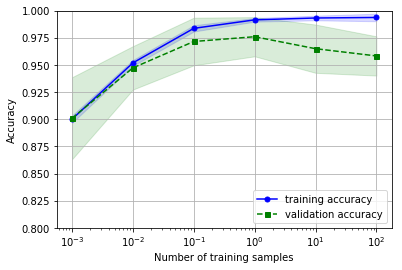

In [49]:
from sklearn.model_selection import validation_curve

param_range = [0.001,0.01,0.1,1.0,10.0 , 100.0 ]

pipe_lr = Pipeline([('scl',StandardScaler()),
                    ('clf',LogisticRegression(penalty='l2',random_state=0,max_iter=1000))])

train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                                         X=X_train,
                                                         y=y_train,
                                                         param_name='clf__C',
                                                         param_range=param_range,
                                                         cv=10)

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std,
                alpha=0.15,
                color='blue')

plt.plot(param_range, test_mean, color='green', linestyle='--', 
         marker='s', markersize=5, label='validation accuracy')

plt.fill_between(param_range, test_mean + test_std,
                 test_mean - test_std,
                alpha=0.15,
                color='green')

plt.grid()

plt.xscale('log')
plt.legend(loc='lower right')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')
plt.ylim([0.8,1.0])

plt.show()

## Fine Tuning via Grid search

In [52]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

pipe_svc = Pipeline([('sc1',StandardScaler()),
                     ('clf',SVC(random_state=1))])

param_range = [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]

param_grid = [{'clf__C':param_range,
               'clf__kernel':['linear']},
               {'clf__C':param_range,
                'clf__gamma':param_range,
                'clf__kernel':['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                 scoring='accuracy',
                 cv=10,
                 n_jobs=-1)

gs = gs.fit(X_train,y_train)

print(gs.best_score_)

print(gs.best_params_)

0.9781159420289856
{'clf__kernel': 'linear', 'clf__C': 0.1}


In [53]:
clf = gs.best_estimator_
clf.fit(X_train,y_train)

print('Test accuracy: %.3f' % clf.score(X_test,y_test))

Test accuracy: 0.965


## Fine Tuning: Combine kfold and Grid Search

In [54]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                 scoring='accuracy',
                 cv=2,
                 n_jobs=-1)

scores = cross_val_score(gs,X_train,y_train,scoring='accuracy',cv=5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.960 +/- 0.026


In [55]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), 
                  param_grid=[{'max_depth':[1,2,3,4,5,6,7,None]}],
                 scoring='accuracy',
                 cv=5)

scores = cross_val_score(gs,X_train,y_train,scoring='accuracy',cv=2)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.912 +/- 0.009


## Confusion Matrics

In [56]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train,y_train)

y_pred = pipe_svc.predict(X_test)

confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)

print(confmat)

[[71  1]
 [ 2 40]]


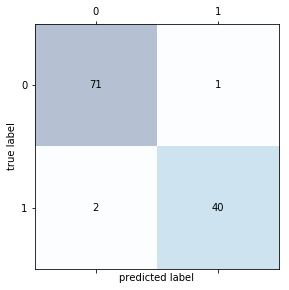

In [58]:
fig, ax = plt.subplots(figsize = (4.5,4.5))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)

for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')

plt.show()

## Precision Recall and F1

$PRE = \frac{TP}{TP + FP}$ **准确率**，正确的数据里面，尽量少的错误，希望拿出来的都是对的

$REC = TPR=\frac{TP}{P}=\frac{TP}{FN+TP}$ **召回率**，尽量少的漏查，希望不放走一个正确的

$F1 = 2\frac{PRE \times REC}{PRE + REC }$

In [60]:
from sklearn.metrics import precision_score

from sklearn.metrics import recall_score,f1_score

print("Precision: %.3f" % precision_score(y_true=y_test,y_pred=y_pred))
print("Recall: %.3f" % recall_score(y_true=y_test,y_pred=y_pred))
print("F1: %.3f" % f1_score(y_true=y_test,y_pred=y_pred))


Precision: 0.976
Recall: 0.952
F1: 0.964


In [61]:
from sklearn.metrics import make_scorer,f1_score

scorer = make_scorer(f1_score,pos_label=0)

gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring=scorer,
                 cv=10)

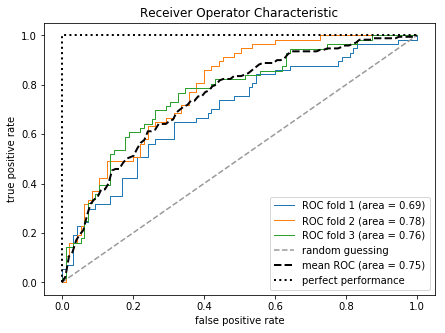

In [70]:
from sklearn.metrics import roc_curve,auc

from scipy import interp

pipe_lr = Pipeline([('scl',StandardScaler()),
                   ('pca',PCA(n_components=2)),
                   ('clf',LogisticRegression(penalty='l2',
                                              random_state=0,
                                              C=100.0))])

X_train2 = X_train[:,[4,14]]

cv = StratifiedKFold(n_splits=3)

fig = plt.figure(figsize=(7,5))

mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr = []

i=0
for (train,test) in cv.split(X= X_train2, y = y_train):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr,tpr,thresholds = roc_curve(y_train[test],probas[:,1],pos_label=1)
    mean_tpr += interp(mean_fpr,fpr,tpr)
    
    mean_tpr[0] = 0.0
    
    roc_auc = auc(fpr,tpr)
   
    plt.plot(fpr,tpr,lw=1,label='ROC fold %d (area = %0.2f)' % (i+1,roc_auc))
    i += 1

plt.plot([0,1],
        [0,1],
        linestyle='--',
        color=(0.6,0.6,0.6),
        label='random guessing')
    
mean_tpr /= cv.get_n_splits()

mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr,mean_tpr)
    
plt.plot(mean_fpr, 
         mean_tpr,
        'k--',
        label='mean ROC (area = %0.2f)' % mean_auc, 
         lw=2)
    
plt.plot([0,0,1],
        [0,1,1],
        lw=2,
        linestyle=':',
        color='black',
        label='perfect performance')

plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')

plt.legend(loc='lower right')
plt.show()

In [71]:
pipe_lr = pipe_lr.fit(X_train2, y_train)
y_pred2 = pipe_lr.predict(X_test[:,[4,14]])

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

print("ROC AUC: %.3f" % roc_auc_score(y_true=y_test,y_score=y_pred2))

print('Accuracy: %.3f' % accuracy_score(y_true=y_test,y_pred=y_pred2))

ROC AUC: 0.662
Accuracy: 0.711


In [73]:
pre_scorer = make_scorer(score_func = precision_score,pos_label =1,greater_is_bettter=True,average='micro')

In [74]:
pre_scorer

make_scorer(precision_score, average=micro, greater_is_bettter=True, pos_label=1)